In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn import svm
from lib import *
from svm import *
from QPslover import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
data, lable  = load_train("./data/0vs8Source.csv")
train_data, train_lable, validation_data, validation_lable = shuffleData(data, lable)
print "train data: ", train_data.shape
print "train lable: ", train_lable.shape
print "validation data: ", validation_data.shape
print "validation lable: ", validation_lable.shape

train data:  (432L, 16L)
train lable:  (432L,)
validation data:  (49L, 16L)
validation lable:  (49L,)


In [3]:
target_data, target_lable  = load_train("./data/0vs8Target.csv")
target_data, target_lable, target_v_data, target_v_lable = shuffleData(target_data, target_lable)
print "train data: ", target_data.shape
print "train lable: ", target_lable.shape
print "validation data: ", target_v_data.shape
print "validation lable: ", target_v_lable.shape

train data:  (36L, 16L)
train lable:  (36L,)
validation data:  (3L, 16L)
validation lable:  (3L,)


In [4]:
# it is 0 vs 8 problem, so divde only two class
train_lable[train_lable <= 4 ] = -1
train_lable[train_lable > 4] = 1
validation_lable[validation_lable <= 4 ] = -1
validation_lable[validation_lable > 4] = 1
target_lable[target_lable <= 4 ] = -1
target_lable[target_lable > 4] = 1
target_v_lable[target_v_lable <= 4 ] = -1
target_v_lable[target_v_lable > 4] = 1

In [5]:
# def correct_rate_only(pre_label, truth_label):
#     num = 0.0
#     for i in range(len(truth_label)):
#         if pre_label[i] == truth_label[i]:
#             num += 1
#     return num / len(truth_label)

In [6]:
# def QP_Slover(train_data, train_lable):
#     # maxmize W(a)
#     def max_w(x):
#         return  np.linalg.norm(x[:16])
#     # constrains:
#     cons = ({'type': 'ineq',
#      'fun' : lambda x: train_lable * (np.dot(x[:16], train_data.T) + x[16]) - 1})
#     # initialize W
#     w_init = np.random.rand(17)
#     # optimization
#     res = minimize(max_w, w_init , method='SLSQP', constraints=cons, options={'disp': True})
#     w_pre = res.x[:16]
#     b_pre = res.x[16]
#     return w_pre, b_pre

In [7]:
# def prediction_QP(w, b, train_data):
#     pre_validation = np.dot(w, target_data.T) + b
#     pre_validation[pre_validation >= 0] =1
#     pre_validation[pre_validation <0 ] = -1
#     return pre_validation
    

In [16]:
w, b = QP_Slover(train_data, train_lable)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.146470989424
            Iterations: 9
            Function evaluations: 174
            Gradient evaluations: 9


In [20]:
pre_vali = prediction_QP(w, b, validation_data)

In [21]:
correct_rate_only(pre_vali, validation_lable)

1.0

Number is :  -1.0
predict:  -1.0


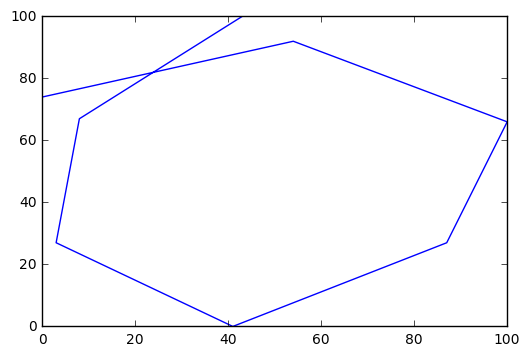

In [22]:
# example visual test
num = 11
visualize(validation_data[num,:],validation_lable[num] )
number = pre_vali[num]
print "predict: ", number